Load Public Health England (PHE) datasets for Clinical Commissioning Groups (CCGs)

In [21]:
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

In [22]:
#load datasets
dir_path='//Users/rony/Dropbox/2. projects/AMR/datasets/Fingertips(PHE)/'
indicators=pd.read_csv(dir_path+'CCGs.csv',low_memory=False)

In [23]:
#Select monthly data (dates=month-date, exclude quaterly data)
ind_monthly=indicators.loc[indicators['Time period'].str.contains('-')]

In [24]:
#Select monthly data (dates=month-date, exclude quaterly data)
#Datetime indexing
new_datetime_index=pd.to_datetime(ind_monthly['Time period'], format='%b-%y')
ind_monthly=ind_monthly.set_index(new_datetime_index)

In [25]:
#Select ccg from monthly data (dates=month-date, exclude quaterly data)
ind_monthly_ccgs=ind_monthly.loc[ind_monthly['Area Name'].str.contains('CCG')]

In [ ]:
#Strip GCC names
temp_series=ind_monthly_ccgs['Area Name'].str.rstrip('CCG')
temp_series1=temp_series.str.lstrip('NHS')
temp_series2=temp_series1.str.strip()
ind_monthly_ccgs['Area Name']=temp_series2
ind_monthly_ccgs.rename(columns = {'Area Name':'CCG'}, inplace = True)

In [27]:
#load metadata
dir_path='//Users/rony/Dropbox/2. projects/AMR/datasets/Fingertips(PHE)/metadata/'
indicators_md=pd.read_csv(dir_path+'AMRlocalindicators.metadata.csv',low_memory=False)
#index by indicators
indicators_md=indicators_md.set_index('Indicator ID')

Compare ccgs: 'Bedfordshire' and 'Barnet' (selected randomly)
Indicator: Twelve month rolling total number of prescribed antibiotic items per STAR-PU by Clinical Commissioning Group (CCG) within England (ID=92377).

In [28]:
indicator=92377
ccg1='Bedfordshire'
ccg2='Barnet'

Indicator description and values

In [13]:
print ('Description: ',indicators_md.loc[indicator,'Indicator full name'],end='.\n')
print ('Methodology: ',indicators_md.loc[indicator,'Methodology'],end='\n')
print ('Unit: ',indicators_md.loc[indicator,'Unit'],end='\n')
print ('Numerator: ',indicators_md.loc[indicator,'Definition of numerator'],end='\n')
print ('Denominator: ',indicators_md.loc[indicator,'Definition of denominator'],end='\n')
print ('Production: ',indicators_md.loc[indicator,'Indicator production'],end='\n')

Description:  Twelve month rolling total number of prescribed antibiotic items per STAR-PU by Clinical Commissioning Group (CCG) within England.
Methodology:  Numerator is divided by the denominator (items divided by STAR-PU)
Unit:  per STAR-PU
Numerator:  Total number of antibiotic items prescribedin practices located within the area. An item is an antibiotic (from British National Formulary Section 5.1) that is prescribed in a primary care settingA prescription item refers to a single item prescribed by a prescriber on a prescription form (known as an FP10). If a prescription form includes three medicines it is counted as three prescription items. The number of items is a measure of how often a prescriber has decided to write a prescription. It is often used when we wish to look at prescriber behaviour as every prescription is an opportunity to change treatment. For vaccinations and acute treatment (for example, a short course of antibiotics) the item is also a reasonable measure of 

In [15]:
ccgs_areas_values=ccgs_areas_values[[]]

In [16]:
#values for 1st ccg
indicator_ccg1=ind_monthly_ccgs[(ind_monthly_ccgs['CCG']==ccg1) &
                             (ind_monthly_ccgs['Indicator ID']==indicator)]
indicator_ccg1_values=indicator_ccg1.loc[:,'Value']

In [17]:
#values for 2nd ccg
indicator_ccg2=ind_monthly_ccgs[(ind_monthly_ccgs['CCG']==ccg2) &
                             (ind_monthly_ccgs['Indicator ID']==indicator)]
indicator_ccg2_values=indicator_ccg2.loc[:,'Value']

In [18]:
print (indicators_md.loc[indicator,'Indicator full name'])

Twelve month rolling total number of prescribed antibiotic items per STAR-PU by Clinical Commissioning Group (CCG) within England


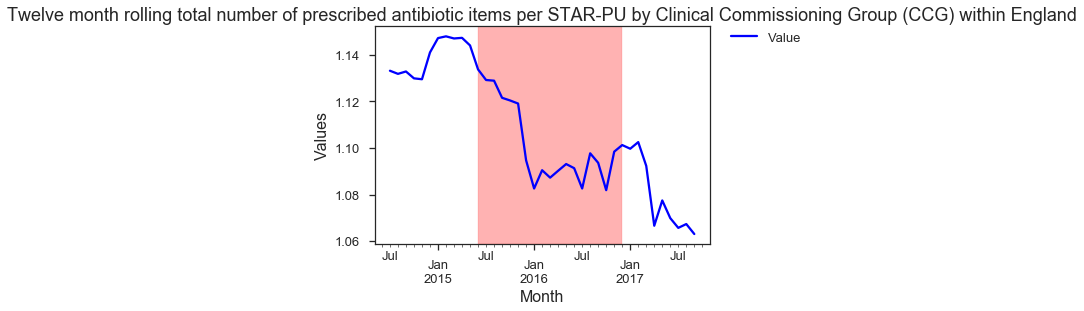

In [19]:
sns.set(context='talk',style='ticks')
ax=indicator_ccg1_values.plot(color='blue')
ax.set_title(indicators_md.loc[indicator,'Indicator full name'], fontsize=18)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Values', fontsize=16)
ax.axvspan('2015-06-01', '2016-12-01', color='red', alpha=0.3) #alpha for transparency
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [20]:
df_compare=pd.DataFrame()
df_compare[ccg1]=indicator_ccg1_values
df_compare[ccg2]=indicator_ccg2_values

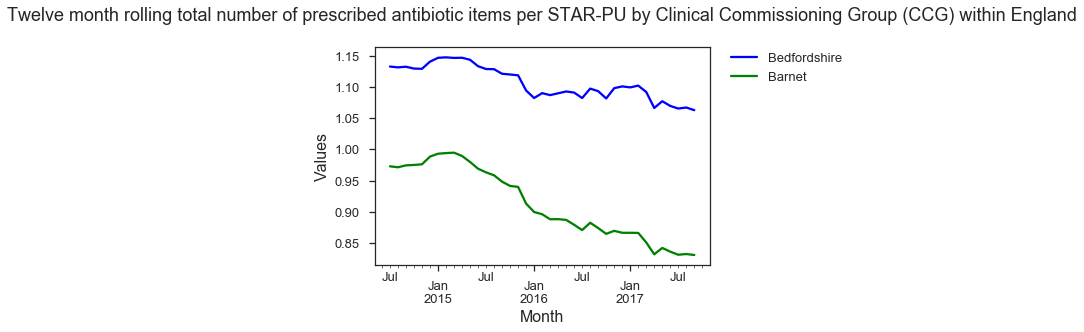

In [21]:
sns.set(context='talk',style='ticks')
ax=df_compare.plot(color=['blue','green'])
ax.set_title(indicators_md.loc[indicator,'Indicator full name']+'\n', fontsize=18)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Values', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

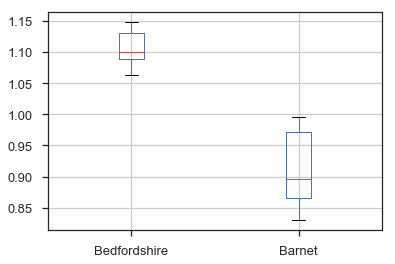

In [22]:
zx = df_compare.boxplot()
plt.show()